/home/innovation-hacking/luebbet/venvs/gr00t_luebbet/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-08-05 12:15:47.566822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-05 12:15:47.566858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-05 12:15:47.567753: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025

Loading dataset... from /media/innovation-hacking/PortableSSD/lerobot_h264
Initialized dataset lerobot_h264 with EmbodimentTag.NEW_EMBODIMENT



=========================================== UR5 Dataset ============================================
{'action.gripper': 'np: [16, 1] float64',
 'action.robot_arm': 'np: [16, 6] float64',
 'annotation.human.task_description': ['Pick up the red cube and place it on '
                                       'the green area'],
 'state.gripper': 'np scalar: 9.866934078672784e-07 [1, 1] float64',
 'state.robot_arm': 'np: [1, 6] float64',
 'video.camera_global': 'np: [1, 512, 512, 3] uint8',
 'video.camera_wrist': 'np: [1, 512, 512, 3] uint8'}
dict_keys(['video.camera_wrist', 'video.camera_global', 'state.robot_arm', 'state.gripper', 'action.robot_arm', 'action.gripper', 'annotation.human.task_description'])


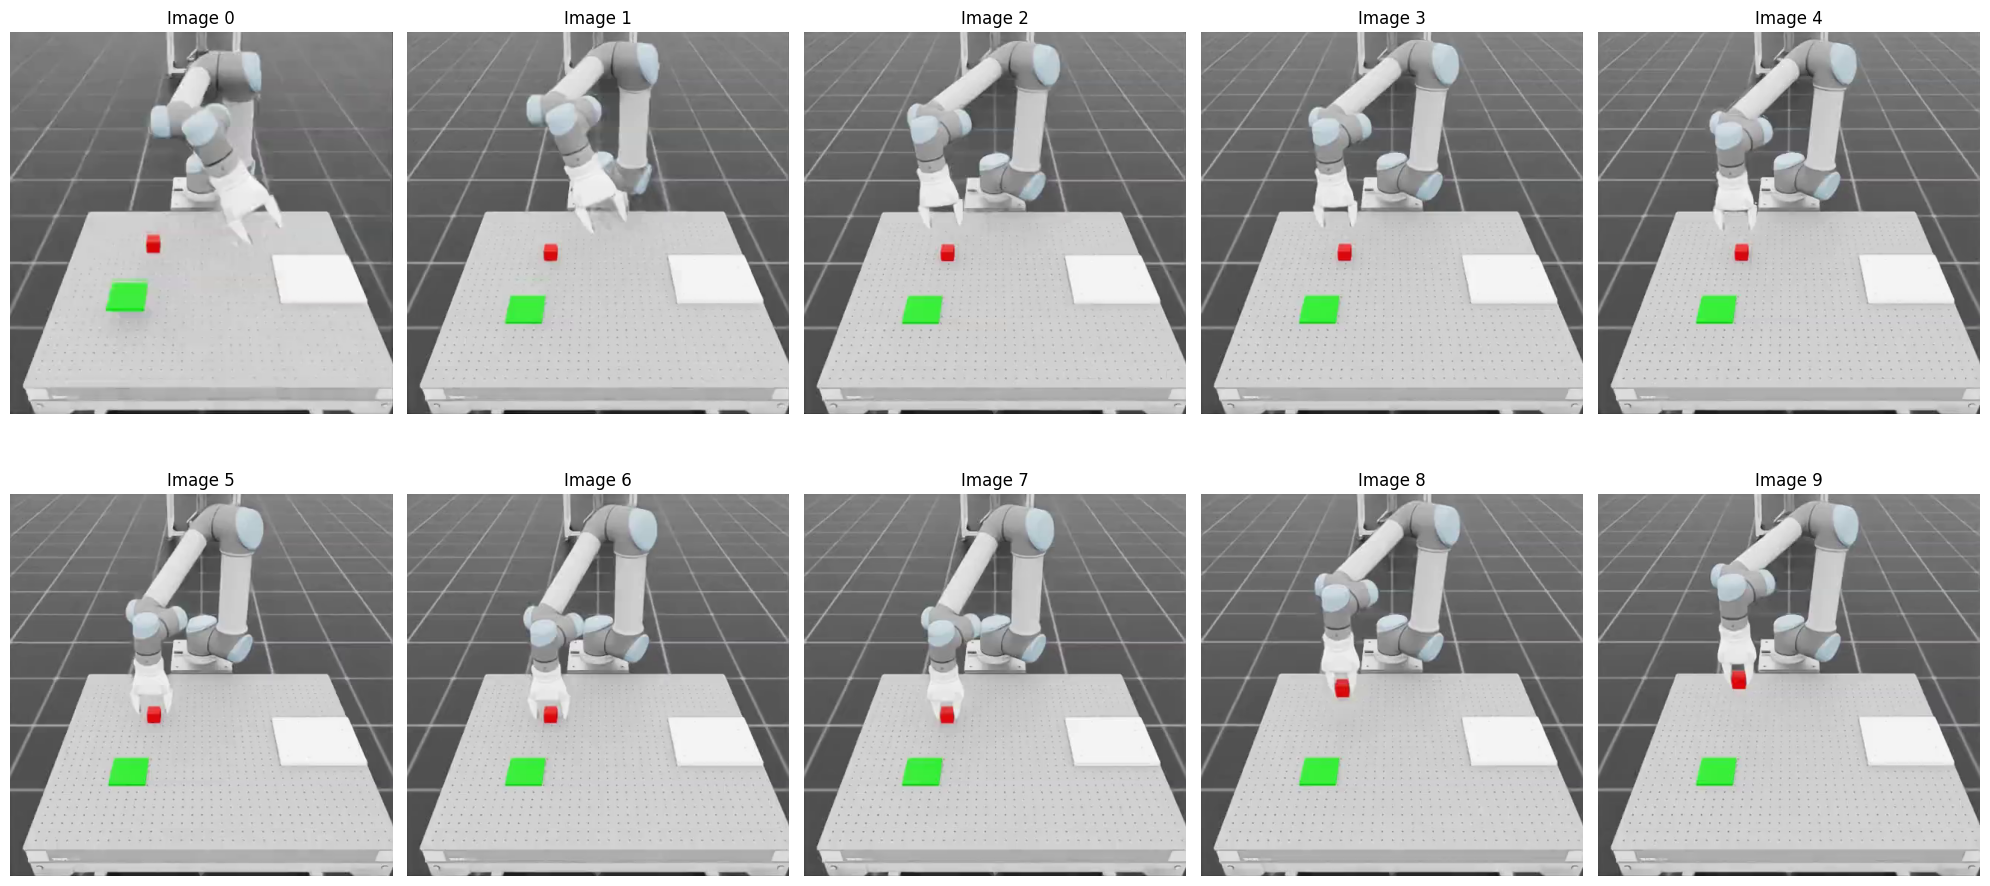

Initialized dataset lerobot_h264 with EmbodimentTag.NEW_EMBODIMENT
{'action': 'np: [16, 32] float64',
 'action_mask': 'np: [16, 32] bool',
 'eagle_content': {'image_inputs': ['Image', 'Image'],
                   'text_list': ['<|im_start|>system\n'
                                 'You are a helpful assistant.<|im_end|>\n'
                                 '<|im_start|>user\n'
                                 '<image-1><image-2>Pick up the red cube and '
                                 'place it on the green area<|im_end|>\n'
                                 '<|im_start|>assistant\n'],
                   'video_inputs': 'None'},
 'embodiment_id': 'int: 31',
 'has_real_action': 'np scalar: True [] bool',
 'segmentation_target': 'np: [2] float64',
 'segmentation_target_mask': 'np scalar: 0.0 [1] float64',
 'state': 'np: [1, 64] float64',
 'state_mask': 'np: [1, 64] bool'}
dict_keys(['state', 'state_mask', 'segmentation_target', 'segmentation_target_mask', 'has_real_action', 'action', 'a

In [1]:
from gr00t.utils.misc import any_describe
from gr00t.data.dataset import LeRobotSingleDataset

from gr00t.data.schema import EmbodimentTag
import os
import gr00t
from gr00t.experiment.data_config import TNGUR5SchunkConfig
import matplotlib.pyplot as plt

# REPO_PATH is the path of the pip install gr00t repo and one level up
REPO_PATH = os.path.dirname(os.path.dirname(gr00t.__file__))
DATA_PATH = os.path.join("/media/innovation-hacking/PortableSSD/lerobot_h264")

print("Loading dataset... from", DATA_PATH)

config = TNGUR5SchunkConfig()
modality_configs = config.modality_config()


embodiment_tag = EmbodimentTag.NEW_EMBODIMENT


dataset = LeRobotSingleDataset(
    DATA_PATH, 
    modality_configs,  
    embodiment_tag=embodiment_tag,
    video_backend="decord"  
)

print('\n'*2)
print("="*100)
print(f"{' UR5 Dataset ':=^100}")
print("="*100)

# print the 7th data point
resp = dataset[7]
any_describe(resp)
print(resp.keys())

images_list = []

for i in range(100):
    if i % 10 == 0:
        resp = dataset[i]
        img = resp["video.camera_global"][0]
        images_list.append(img)


fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(images_list[i])
    ax.axis("off")
    ax.set_title(f"Image {i}")
plt.tight_layout() # adjust the subplots to fit into the figure area.
plt.show()

video_modality = modality_configs["video"]
state_modality = modality_configs["state"]
action_modality = modality_configs["action"]

# select the transforms you want to apply to the data
to_apply_transforms = config.transform()

dataset = LeRobotSingleDataset(
    DATA_PATH,
    modality_configs,
    transforms=to_apply_transforms,
    embodiment_tag=embodiment_tag
)

# print the 7th data point
resp = dataset[7]
any_describe(resp)
print(resp.keys())